
**Q1**

In \[ \]:

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    #Read data from csv file
    data = pd.read_csv('data.csv')
    data.head()

Out\[ \]:

|     | no  | tv    | radio | newspaper | sales |
|-----|-----|-------|-------|-----------|-------|
| 0   | 1   | 230.1 | 37.8  | 69.2      | 22.1  |
| 1   | 2   | 44.5  | 39.3  | 45.1      | 10.4  |
| 2   | 3   | 17.2  | 45.9  | 69.3      | 9.3   |
| 3   | 4   | 151.5 | 41.3  | 58.5      | 18.5  |
| 4   | 5   | 180.8 | 10.8  | 58.4      | 12.9  |





In \[ \]:

    data.shape

Out\[ \]:

    (200, 5)

In \[ \]:

    data.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 200 entries, 0 to 199
    Data columns (total 5 columns):
     #   Column     Non-Null Count  Dtype  
    ---  ------     --------------  -----  
     0   no         200 non-null    int64  
     1   tv         200 non-null    float64
     2   radio      200 non-null    float64
     3   newspaper  200 non-null    float64
     4   sales      200 non-null    float64
    dtypes: float64(4), int64(1)
    memory usage: 7.9 KB

In \[ \]:

    #Check for missing values
    np.sum(data.isnull())

Out\[ \]:

    no           0
    tv           0
    radio        0
    newspaper    0
    sales        0
    dtype: int64

In \[ \]:

    #Check if there is duplicate rows
    np.sum(data.duplicated())

Out\[ \]:

    0

In \[ \]:

    #Histogram of numeric variables
    var_ind = [1, 2, 3, 4]
    plt.figure(figsize = (9, 3))
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    for i in range(1, 5):
        plt.subplot(1, 4, i)
        plt.hist(x = data.iloc[: , var_ind[i - 1]], alpha = 0.4, color = 'red')
        plt.title(data.columns[var_ind[i - 1]])

![](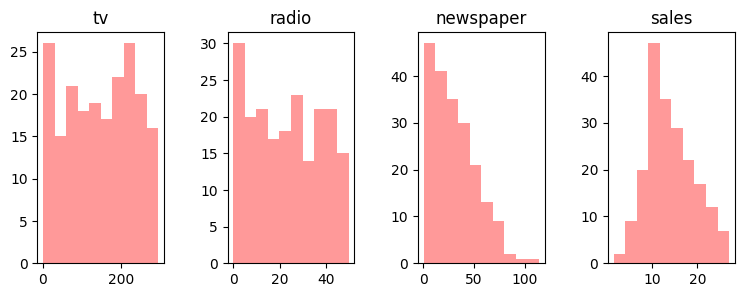%0A)

In \[ \]:

    #Summary statistics of numeric variables
    data[['tv', 'radio', 'newspaper', 'sales']].describe()

Out\[ \]:

|       | tv         | radio      | newspaper  | sales      |
|-------|------------|------------|------------|------------|
| count | 200.000000 | 200.000000 | 200.000000 | 200.000000 |
| mean  | 147.042500 | 23.264000  | 30.554000  | 14.022500  |
| std   | 85.854236  | 14.846809  | 21.778621  | 5.217457   |
| min   | 0.700000   | 0.000000   | 0.300000   | 1.600000   |
| 25%   | 74.375000  | 9.975000   | 12.750000  | 10.375000  |
| 50%   | 149.750000 | 22.900000  | 25.750000  | 12.900000  |
| 75%   | 218.825000 | 36.525000  | 45.100000  | 17.400000  |
| max   | 296.400000 | 49.600000  | 114.000000 | 27.000000  |





In \[ \]:

    #Check for outliers
    plt.boxplot(data['sales'])
    plt.xlabel('Sales')
    plt.ylabel('*1000$')
    plt.show()
    #Boxplot for multiple groups
    plt.boxplot([data.tv,
                 data.radio,
                 data.newspaper])
    plt.title('Boxplot of Budjets vs. Medias')
    plt.xticks(ticks = list(range(1, 4)),
               labels = ['tv', 'radio', 'newspaper'])
    plt.xlabel('Advertisement Media')
    plt.ylabel('Budget')
    plt.show()
    # As we can see there are just two outliers that I decided not to
    # remove them now cause there isn't anything that weird about them
    # so in our next steps we can drop some of these outliers (it should
    # be less than 1 percent of the total data, here less than 2 numbers)

![](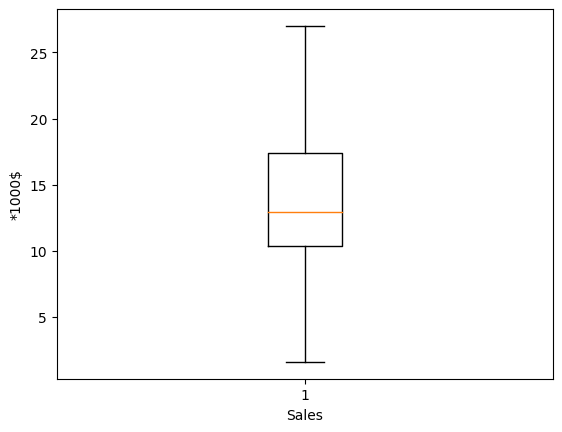%0A)

![](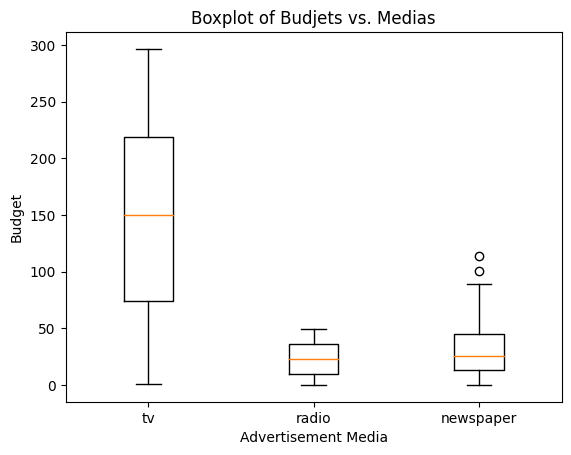%0A)

In \[ \]:

    #Outlier detection using Tukey's method
    from scipy.stats import iqr
    def outlier_detector(df, colname = 'newspaper'):
        #Calculate lower band and upper bound for Tukey's method
        lb = np.quantile(df[colname], 0.25) - 1.5 * iqr(df[colname])
        ub = np.quantile(df[colname], 0.75) + 1.5 * iqr(df[colname])
        #Return rows w/ outliers in colname
        return df.loc[(df[colname] > ub) | (df[colname] < lb), :]
    outlier_detector(df = data)

Out\[ \]:

|     | no  | tv    | radio | newspaper | sales |
|-----|-----|-------|-------|-----------|-------|
| 16  | 17  | 67.8  | 36.6  | 114.0     | 12.5  |
| 101 | 102 | 296.4 | 36.3  | 100.9     | 23.8  |





In \[ \]:

    #Correlation analysis
    round(data.iloc[:, [4, 1, 2, 3]].corr(method = 'pearson'), 2)

Out\[ \]:

|           | sales | tv   | radio | newspaper |
|-----------|-------|------|-------|-----------|
| sales     | 1.00  | 0.78 | 0.58  | 0.23      |
| tv        | 0.78  | 1.00 | 0.05  | 0.06      |
| radio     | 0.58  | 0.05 | 1.00  | 0.35      |
| newspaper | 0.23  | 0.06 | 0.35  | 1.00      |





In \[ \]:

    #Scatter plot
    var_ind = [1, 2, 3]
    plt.figure(figsize = (15, 6))
    plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
    for i in range(1, 4):
        plt.subplot(1, 3, i)
        plt.scatter(x = data.iloc[: , var_ind[i - 1]], y = data['sales'], alpha = 0.4, color = 'red')
        plt.title('Sales vs. ' + data.columns[var_ind[i - 1]])

    # As we can see, obviously we can't model these data with a linear function cause we
    # can't see a good linear relation between them. Specificly for newspaper with high
    # variance.

![](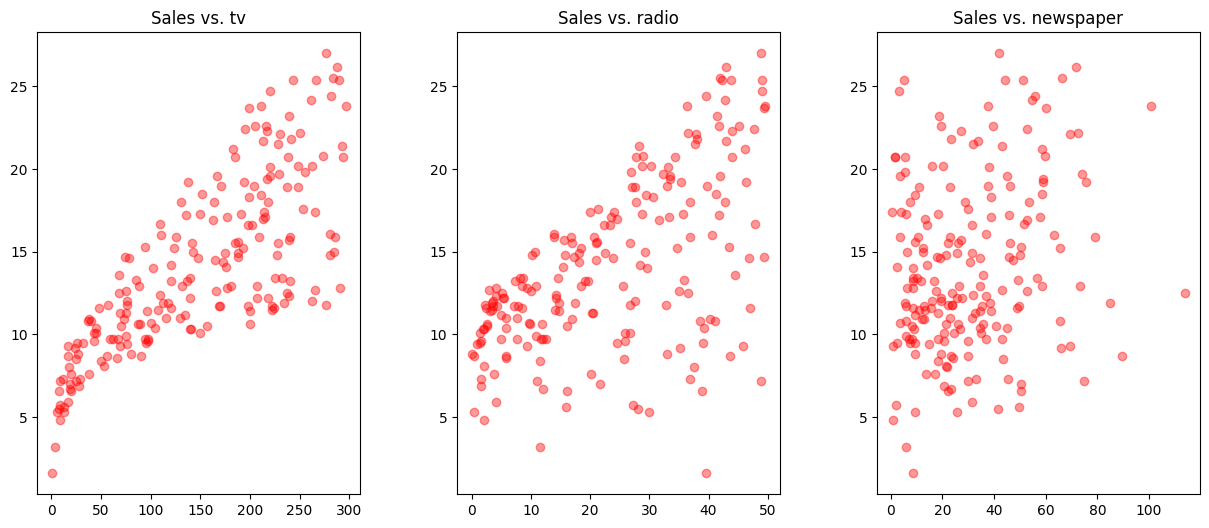%0A)

In \[ \]:

    # b)
    # Build Linear Regression Model
    # Split data into test and train (we should split data with the relation 80 to 20
    # because of data shortage)
    from sklearn.model_selection import train_test_split
    train, test = train_test_split(data, test_size = 0.2, random_state = 123)
    print(train.shape)
    print(test.shape)

    (160, 5)
    (40, 5)

In \[ \]:

    #Define feature matrix
    X_train1 = train[['tv']]
    X_train1 = sm.add_constant(X_train1) #add constant
    X_train1.head()

Out\[ \]:

|     | const | tv    |
|-----|-------|-------|
| 24  | 1.0   | 62.3  |
| 150 | 1.0   | 280.7 |
| 114 | 1.0   | 78.2  |
| 33  | 1.0   | 265.6 |
| 23  | 1.0   | 228.3 |





In \[ \]:

    #Define response matrix
    y_train1 = train['sales']
    y_train1

Out\[ \]:

    24      9.7
    150    16.1
    114    14.6
    33     17.4
    23     15.5
           ...
    17     24.4
    98     25.4
    66      9.5
    126     6.6
    109    19.8
    Name: sales, Length: 160, dtype: float64

In \[ \]:

    #Linear regression - model 1
    model_b1 = sm.OLS(y_train1, X_train1).fit()
    model_b1.summary()
    #  با توجه به اینکه میزان ضریب تعیین قابل قبول نیست، نشان‌دهننده این است که
    # پراکندگی حول مدل ما زیاد است و درصد قابل قبولی از واریانس داده‌ها را مدل نشان نمی‌دهد که باعث می‌شود
    # به مدل‌های دیگری مثل (درجه ۲ بودن متغیر یا حتی رادیکالی بودن آن فکر کنیم)
    # به صورت کلی کورلیشن نسبتا کم است و با مشاهده بتا۱ نیز می‌توانیم به این نتیجه برسیم
    # که شیب نمودار ما نیز کم است و اثرپذیری متغیر پاسخ به نسبت تلویزیون نسبتا کم است

Out\[ \]:

|                   |                  |                     |          |
|-------------------|------------------|---------------------|----------|
| Dep. Variable:    | sales            | R-squared:          | 0.592    |
| Model:            | OLS              | Adj. R-squared:     | 0.589    |
| Method:           | Least Squares    | F-statistic:        | 229.2    |
| Date:             | Tue, 09 Apr 2024 | Prob (F-statistic): | 1.44e-32 |
| Time:             | 19:01:58         | Log-Likelihood:     | -416.24  |
| No. Observations: | 160              | AIC:                | 836.5    |
| Df Residuals:     | 158              | BIC:                | 842.6    |
| Df Model:         | 1                |                     |          |
| Covariance Type:  | nonrobust        |                     |          |

OLS Regression Results

|       |        |         |        |          |         |         |
|-------|--------|---------|--------|----------|---------|---------|
|       | coef   | std err | t      | P\>\|t\| | \[0.025 | 0.975\] |
| const | 7.1815 | 0.525   | 13.673 | 0.000    | 6.144   | 8.219   |
| tv    | 0.0459 | 0.003   | 15.140 | 0.000    | 0.040   | 0.052   |

|                |        |                   |       |
|----------------|--------|-------------------|-------|
| Omnibus:       | 1.234  | Durbin-Watson:    | 1.835 |
| Prob(Omnibus): | 0.539  | Jarque-Bera (JB): | 1.130 |
| Skew:          | -0.022 | Prob(JB):         | 0.568 |
| Kurtosis:      | 2.591  | Cond. No.         | 351\. |

  
  
Notes:  
\[1\] Standard Errors assume that the covariance matrix of the errors is
correctly specified.

In \[ \]:

    #Function to plot histogram of residuals
    def hist_residuals(model, bins = 50):
        #Calculate density
        from scipy import stats
        density = stats.gaussian_kde(model.resid)
        xp = np.linspace(model.resid.min(), model.resid.max(), 100)
        yp = density.pdf(xp)

        #Histogram
        plt.hist(model.resid, bins = bins,
                 color = 'red', alpha = 0.7, density = True)
        plt.axvline(model.resid.mean(), color = 'black',
                    linewidth = 2, linestyle = '--', label = "Average")
        plt.title('Histogram of Residuals')
        plt.xlabel('Residuals')
        plt.ylabel('Density')
        plt.plot(xp, yp, color = 'black', linewidth = 2)
        plt.legend()

        return plt.show()

In \[ \]:

    #Histogram of residuals - model 1
    hist_residuals(model_b1)

![](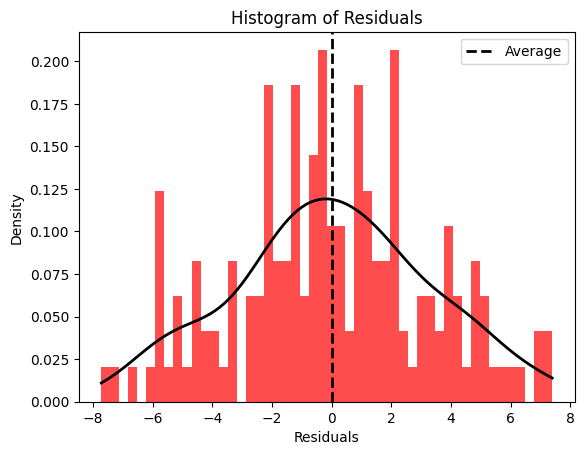%0A)

In \[ \]:

    #QQ-plot - model 1
    sm.qqplot(model_b1.resid, line = 's')
    plt.show()

![](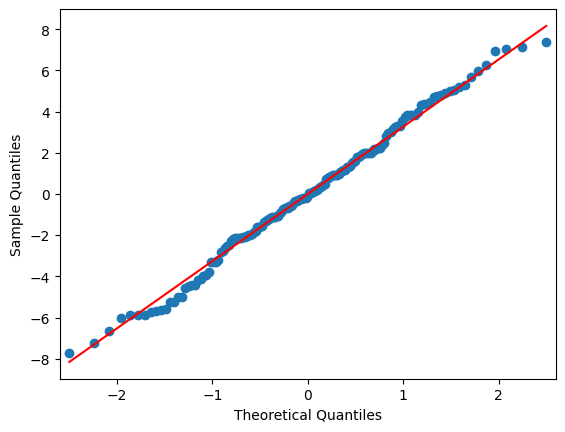%0A)

In \[ \]:

    #Function to plot residuals vs. fitted values
    def residuals_fittedvalues_plot(model):
        #Implement Lowess algorithm
        lowess_res = sm.nonparametric.lowess(model.resid, model.fittedvalues)

        #Scatter plot: residuals vs. fitted values
        plt.scatter(x = model.fittedvalues, y = model.resid,
                    color = 'red', alpha = 0.7, label = 'data')
        plt.title('Residuals vs. Fitted values')
        plt.xlabel('Fitted Values', fontsize = 12)
        plt.ylabel('Residuals', fontsize = 12)
        plt.grid()

        #Add LOWESS line
        plt.plot(lowess_res[:, 0], lowess_res[:, 1], 'black',
                 alpha = 0.8, linewidth = 2, label = 'LOWESS')
        plt.legend()

        #Top three observations with greates absolute value of the residual
        top3 = abs(model.resid).sort_values(ascending = False)[:3]
        for i in top3.index:
            plt.annotate(i, xy = (model.fittedvalues[i], model.resid[i]), color = 'blue')

        return plt.show()
        # زمانی که به نمودار پایین نگاه میکنیم متوجه الگویی قیفی شکل می‌شویم که نشان می‌دهد مدل
        # ما به اندازه کافی خوب نبوده است

In \[ \]:

    #Scatter plot of residuals vs. fitted values - model 1
    residuals_fittedvalues_plot(model_b1)

![](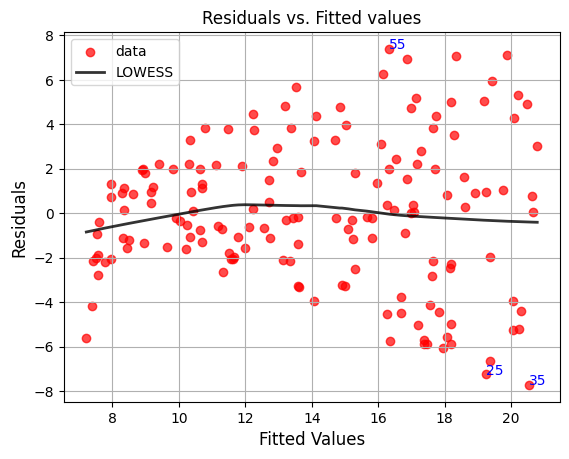%0A)

In \[ \]:

    train.iloc[[55, 25, 35], :]

Out\[ \]:

|     | no  | tv    | radio | newspaper | sales |
|-----|-----|-------|-------|-----------|-------|
| 5   | 6   | 8.7   | 48.9  | 75.0      | 7.2   |
| 151 | 152 | 121.0 | 8.4   | 48.7      | 11.6  |
| 44  | 45  | 25.1  | 25.7  | 43.3      | 8.5   |





In \[ \]:

    #Function to check Cook's distance
    def influencer_detector(model, thershold = 1):

        #create instance of influence
        influence = model.get_influence()

        #Obtain Cook's distance for each observation
        cooks = influence.cooks_distance

        #Check observations w/ Cook's distance greater than thershold
        return np.where(cooks[0] > 1)

In \[ \]:

    #Check Cook's ditance - model 1
    influencer_detector(model_b1)
    # As we can see, we can't drop any outliers here.

Out\[ \]:

    (array([], dtype=int64),)

In \[ \]:

    #Box-Cox transformation
    from sklearn.preprocessing import PowerTransformer
    boxcox = PowerTransformer(method = 'box-cox')
    boxcox.fit(y_train1.values.reshape(-1, 1))
    boxcox.lambdas_
    # We decided to translate the data to reduce the variance to find a model
    # with better performance

Out\[ \]:

    array([0.65457649])

In \[ \]:

    trans_y_train = boxcox.fit_transform(y_train1.values.reshape(-1, 1))
    plt.hist(trans_y_train, color = 'red', alpha = 0.5, bins = 50)
    plt.show()

![](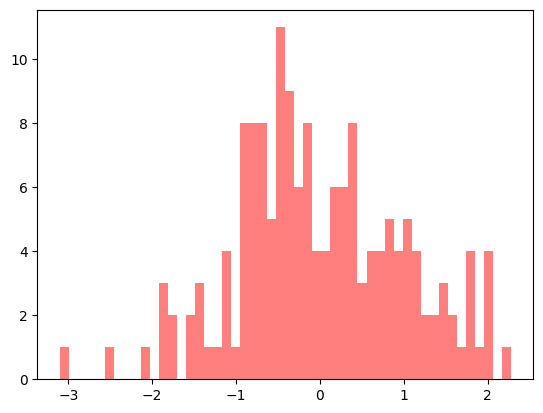%0A)

In \[ \]:

    #Linear regression - model 2
    model_b2 = sm.OLS(trans_y_train, X_train1).fit()
    model_b2.summary()

Out\[ \]:

|                   |                  |                     |          |
|-------------------|------------------|---------------------|----------|
| Dep. Variable:    | y                | R-squared:          | 0.608    |
| Model:            | OLS              | Adj. R-squared:     | 0.605    |
| Method:           | Least Squares    | F-statistic:        | 244.9    |
| Date:             | Tue, 09 Apr 2024 | Prob (F-statistic): | 6.16e-34 |
| Time:             | 19:01:59         | Log-Likelihood:     | -152.14  |
| No. Observations: | 160              | AIC:                | 308.3    |
| Df Residuals:     | 158              | BIC:                | 314.4    |
| Df Model:         | 1                |                     |          |
| Covariance Type:  | nonrobust        |                     |          |

OLS Regression Results

|       |         |         |         |          |         |         |
|-------|---------|---------|---------|----------|---------|---------|
|       | coef    | std err | t       | P\>\|t\| | \[0.025 | 0.975\] |
| const | -1.3716 | 0.101   | -13.605 | 0.000    | -1.571  | -1.172  |
| tv    | 0.0091  | 0.001   | 15.650  | 0.000    | 0.008   | 0.010   |

|                |        |                   |       |
|----------------|--------|-------------------|-------|
| Omnibus:       | 2.952  | Durbin-Watson:    | 1.802 |
| Prob(Omnibus): | 0.229  | Jarque-Bera (JB): | 2.698 |
| Skew:          | -0.237 | Prob(JB):         | 0.259 |
| Kurtosis:      | 2.576  | Cond. No.         | 351\. |

  
  
Notes:  
\[1\] Standard Errors assume that the covariance matrix of the errors is
correctly specified.

In \[ \]:

    #Histogram of residuals - model 2
    hist_residuals(model_b2)

![](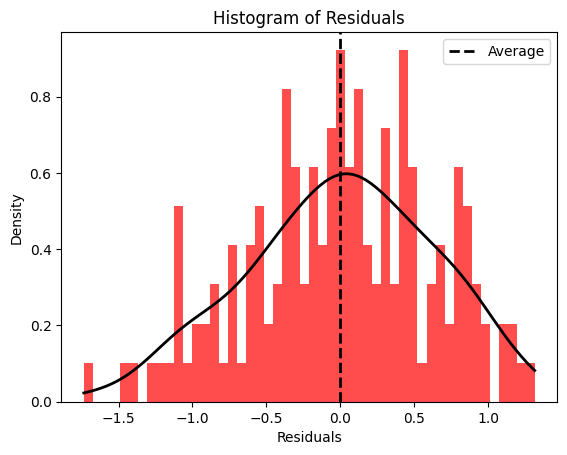%0A)

In \[ \]:

    #QQ-plot - model 2
    sm.qqplot(model_b2.resid, line = 's')
    plt.show()

![](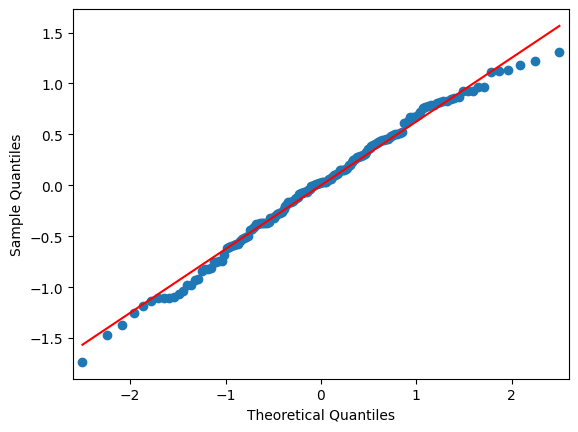%0A)

In \[ \]:

    #Scatter plot of residuals vs. fitted values - model 2
    residuals_fittedvalues_plot(model_b2)
    # When we compare these 2 models we can see a little improvement in the
    # transform one, but it isn't satisfactory again.

![](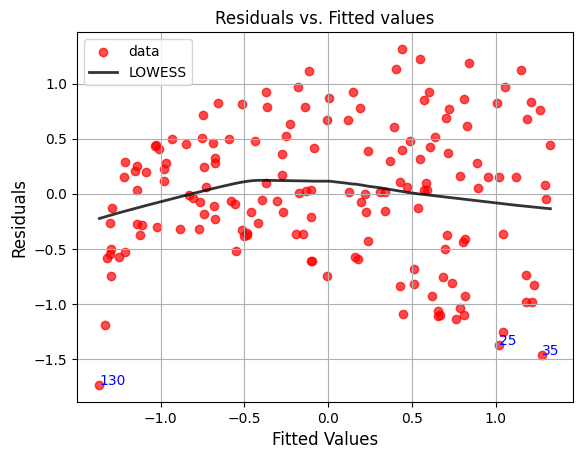%0A)

In \[ \]:

    #Check Cook's ditance - model 2
    influencer_detector(model_b2)

Out\[ \]:

    (array([], dtype=int64),)

In \[ \]:

    train['tv_tv'] = data['tv'] * data['tv']
    train.head()

Out\[ \]:

|     | no  | tv    | radio | newspaper | sales | tv_tv    |
|-----|-----|-------|-------|-----------|-------|----------|
| 24  | 25  | 62.3  | 12.6  | 18.3      | 9.7   | 3881.29  |
| 150 | 151 | 280.7 | 13.9  | 37.0      | 16.1  | 78792.49 |
| 114 | 115 | 78.2  | 46.8  | 34.5      | 14.6  | 6115.24  |
| 33  | 34  | 265.6 | 20.0  | 0.3       | 17.4  | 70543.36 |
| 23  | 24  | 228.3 | 16.9  | 26.2      | 15.5  | 52120.89 |





In \[ \]:

    #Define feature matrix
    X_train3 = train[['tv_tv']]
    X_train3 = sm.add_constant(X_train3) #add constant
    X_train3.head()

Out\[ \]:

|     | const | tv_tv    |
|-----|-------|----------|
| 24  | 1.0   | 3881.29  |
| 150 | 1.0   | 78792.49 |
| 114 | 1.0   | 6115.24  |
| 33  | 1.0   | 70543.36 |
| 23  | 1.0   | 52120.89 |





In \[ \]:

    #Define response matrix
    y_train3 = train['sales']
    y_train3

Out\[ \]:

    24      9.7
    150    16.1
    114    14.6
    33     17.4
    23     15.5
           ...
    17     24.4
    98     25.4
    66      9.5
    126     6.6
    109    19.8
    Name: sales, Length: 160, dtype: float64

In \[ \]:

    #Linear regression - model 3
    model_b3 = sm.OLS(y_train3, X_train3).fit()
    model_b3.summary()

Out\[ \]:

|                   |                  |                     |          |
|-------------------|------------------|---------------------|----------|
| Dep. Variable:    | sales            | R-squared:          | 0.523    |
| Model:            | OLS              | Adj. R-squared:     | 0.520    |
| Method:           | Least Squares    | F-statistic:        | 173.3    |
| Date:             | Tue, 09 Apr 2024 | Prob (F-statistic): | 3.45e-27 |
| Time:             | 19:02:01         | Log-Likelihood:     | -428.72  |
| No. Observations: | 160              | AIC:                | 861.4    |
| Df Residuals:     | 158              | BIC:                | 867.6    |
| Df Model:         | 1                |                     |          |
| Covariance Type:  | nonrobust        |                     |          |

OLS Regression Results

|       |        |          |        |          |         |         |
|-------|--------|----------|--------|----------|---------|---------|
|       | coef   | std err  | t      | P\>\|t\| | \[0.025 | 0.975\] |
| const | 9.8134 | 0.430    | 22.844 | 0.000    | 8.965   | 10.662  |
| tv_tv | 0.0001 | 1.08e-05 | 13.164 | 0.000    | 0.000   | 0.000   |

|                |        |                   |          |
|----------------|--------|-------------------|----------|
| Omnibus:       | 0.943  | Durbin-Watson:    | 1.876    |
| Prob(Omnibus): | 0.624  | Jarque-Bera (JB): | 0.965    |
| Skew:          | -0.051 | Prob(JB):         | 0.617    |
| Kurtosis:      | 2.634  | Cond. No.         | 6.07e+04 |

  
  
Notes:  
\[1\] Standard Errors assume that the covariance matrix of the errors is
correctly specified.  
\[2\] The condition number is large, 6.07e+04. This might indicate that
there are  
strong multicollinearity or other numerical problems.

In \[ \]:

    #Histogram of residuals - model 3
    hist_residuals(model_b3)

![](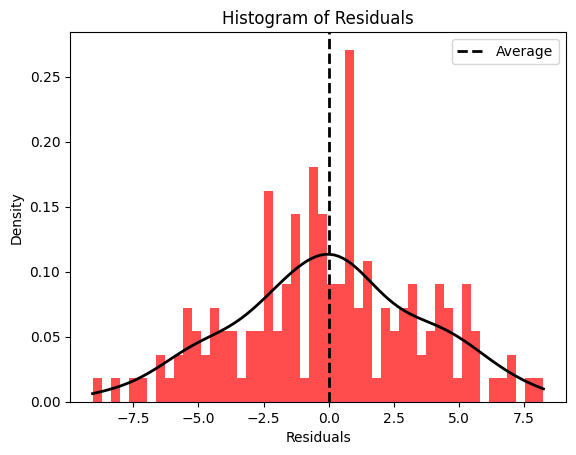%0A)

In \[ \]:

    #QQ-plot - model 3
    sm.qqplot(model_b3.resid, line = 's')
    plt.show()

![](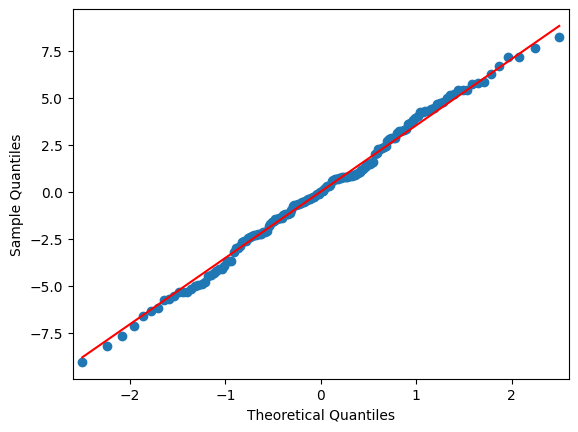%0A)

In \[ \]:

    #Scatter plot of residuals vs. fitted values - model 3
    residuals_fittedvalues_plot(model_b3)
    # As we can see there isn't that much difference between two different
    # feature matrix
    # In previous model there is 1$ (B1 = 0.001 * 1000$) increase in sales of the product
    # for expect every $1,000 increase in the TV advertising budget. This increase for
    # our first model was ~46$ (B1 = 0.0459).
    # Finally in the firs model our r-square was less than second one but the B1 was bigger
    # than the next one, also the AIC and BIC was less in the second model that show the
    # improvement but the interpretation of the B1 became more hard. Overally it depends
    # on the situation to decide between the importance of the metrics (R^2, AIC, BIC, Log)
    # For analyzing another model with both tv and tv^2 as features we can see the next model
    # as we can see r-squared is better but when we see the plot for residuals vs. fitted values
    # , obviously we can see the patter that isn't good for us, so I think we should try another
    # thing to find a better model.

![](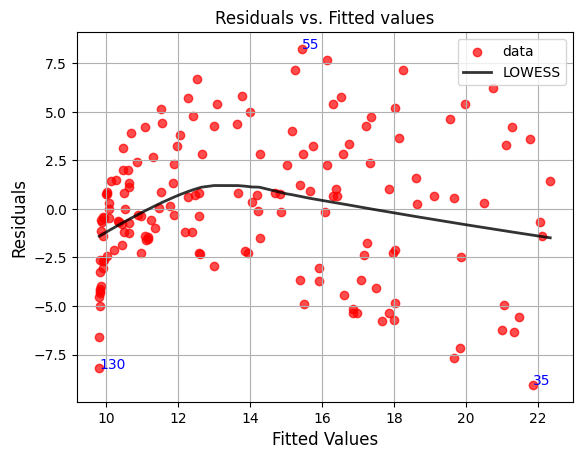%0A)

In \[ \]:

    #Define feature matrix
    X_train4 = train[['tv', 'tv_tv']]
    X_train4 = sm.add_constant(X_train4) #add constant
    X_train4.head()

Out\[ \]:

|     | const | tv    | tv_tv    |
|-----|-------|-------|----------|
| 24  | 1.0   | 62.3  | 3881.29  |
| 150 | 1.0   | 280.7 | 78792.49 |
| 114 | 1.0   | 78.2  | 6115.24  |
| 33  | 1.0   | 265.6 | 70543.36 |
| 23  | 1.0   | 228.3 | 52120.89 |





In \[ \]:

    #Define response matrix
    y_train4 = train['sales']
    y_train4

Out\[ \]:

    24      9.7
    150    16.1
    114    14.6
    33     17.4
    23     15.5
           ...
    17     24.4
    98     25.4
    66      9.5
    126     6.6
    109    19.8
    Name: sales, Length: 160, dtype: float64

In \[ \]:

    #Linear regression - model 3
    model_b4 = sm.OLS(y_train4, X_train4).fit()
    model_b4.summary()

Out\[ \]:

|                   |                  |                     |          |
|-------------------|------------------|---------------------|----------|
| Dep. Variable:    | sales            | R-squared:          | 0.599    |
| Model:            | OLS              | Adj. R-squared:     | 0.594    |
| Method:           | Least Squares    | F-statistic:        | 117.5    |
| Date:             | Tue, 09 Apr 2024 | Prob (F-statistic): | 6.37e-32 |
| Time:             | 19:03:20         | Log-Likelihood:     | -414.75  |
| No. Observations: | 160              | AIC:                | 835.5    |
| Df Residuals:     | 157              | BIC:                | 844.7    |
| Df Model:         | 2                |                     |          |
| Covariance Type:  | nonrobust        |                     |          |

OLS Regression Results

|       |            |          |        |          |         |          |
|-------|------------|----------|--------|----------|---------|----------|
|       | coef       | std err  | t      | P\>\|t\| | \[0.025 | 0.975\]  |
| const | 6.2178     | 0.766    | 8.112  | 0.000    | 4.704   | 7.732    |
| tv    | 0.0659     | 0.012    | 5.474  | 0.000    | 0.042   | 0.090    |
| tv_tv | -6.836e-05 | 3.98e-05 | -1.717 | 0.088    | -0.000  | 1.03e-05 |

|                |       |                   |          |
|----------------|-------|-------------------|----------|
| Omnibus:       | 1.480 | Durbin-Watson:    | 1.814    |
| Prob(Omnibus): | 0.477 | Jarque-Bera (JB): | 1.292    |
| Skew:          | 0.049 | Prob(JB):         | 0.524    |
| Kurtosis:      | 2.571 | Cond. No.         | 1.18e+05 |

  
  
Notes:  
\[1\] Standard Errors assume that the covariance matrix of the errors is
correctly specified.  
\[2\] The condition number is large, 1.18e+05. This might indicate that
there are  
strong multicollinearity or other numerical problems.

In \[ \]:

    #Histogram of residuals - model 3
    hist_residuals(model_b4)

![](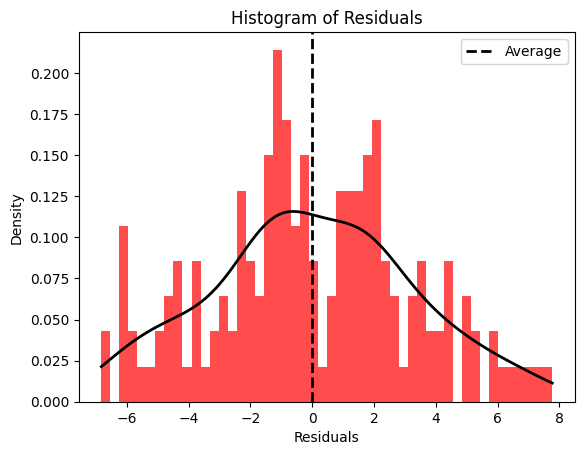%0A)

In \[ \]:

    #QQ-plot - model 3
    sm.qqplot(model_b4.resid, line = 's')
    plt.show()

![](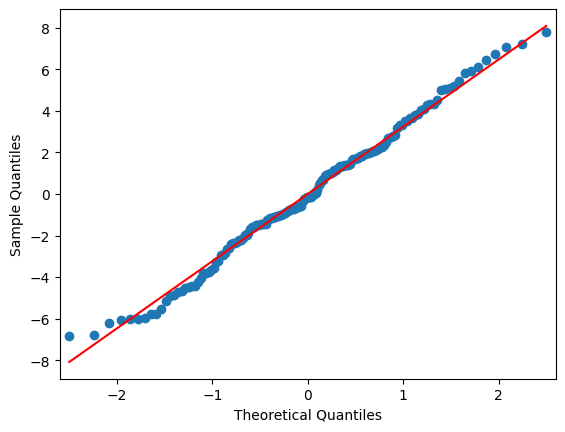%0A)

In \[ \]:

    #Scatter plot of residuals vs. fitted values - model 3
    residuals_fittedvalues_plot(model_b4)

![](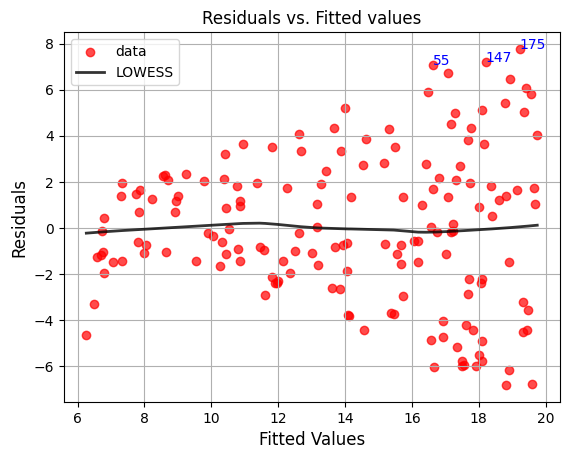%0A)

In \[ \]:

    # c)
    # Build Linear Regression Model
    # Split data into test and train
    from sklearn.model_selection import train_test_split
    train, test = train_test_split(data, test_size = 0.2, random_state = 123)
    print(train.shape)
    print(test.shape)

    (160, 5)
    (40, 5)

In \[ \]:

    #Define feature matrix
    X_train = train[['tv', 'radio', 'newspaper']]
    X_train = sm.add_constant(X_train) #add constant
    X_train.head()

Out\[ \]:

|     | const | tv    | radio | newspaper |
|-----|-------|-------|-------|-----------|
| 24  | 1.0   | 62.3  | 12.6  | 18.3      |
| 150 | 1.0   | 280.7 | 13.9  | 37.0      |
| 114 | 1.0   | 78.2  | 46.8  | 34.5      |
| 33  | 1.0   | 265.6 | 20.0  | 0.3       |
| 23  | 1.0   | 228.3 | 16.9  | 26.2      |





In \[ \]:

    #Define response matrix
    y_train = train['sales']
    y_train

Out\[ \]:

    24      9.7
    150    16.1
    114    14.6
    33     17.4
    23     15.5
           ...
    17     24.4
    98     25.4
    66      9.5
    126     6.6
    109    19.8
    Name: sales, Length: 160, dtype: float64

In \[ \]:

    #Linear regression - model 1
    model_1 = sm.OLS(y_train, X_train).fit()
    model_1.summary()

Out\[ \]:

|                   |                  |                     |          |
|-------------------|------------------|---------------------|----------|
| Dep. Variable:    | sales            | R-squared:          | 0.887    |
| Model:            | OLS              | Adj. R-squared:     | 0.885    |
| Method:           | Least Squares    | F-statistic:        | 409.8    |
| Date:             | Tue, 09 Apr 2024 | Prob (F-statistic): | 9.89e-74 |
| Time:             | 17:10:05         | Log-Likelihood:     | -313.24  |
| No. Observations: | 160              | AIC:                | 634.5    |
| Df Residuals:     | 156              | BIC:                | 646.8    |
| Df Model:         | 3                |                     |          |
| Covariance Type:  | nonrobust        |                     |          |

OLS Regression Results

|           |         |         |        |          |         |         |
|-----------|---------|---------|--------|----------|---------|---------|
|           | coef    | std err | t      | P\>\|t\| | \[0.025 | 0.975\] |
| const     | 2.9242  | 0.365   | 8.018  | 0.000    | 2.204   | 3.645   |
| tv        | 0.0456  | 0.002   | 28.437 | 0.000    | 0.042   | 0.049   |
| radio     | 0.1865  | 0.010   | 18.700 | 0.000    | 0.167   | 0.206   |
| newspaper | -0.0006 | 0.007   | -0.094 | 0.925    | -0.014  | 0.013   |

|                |        |                   |          |
|----------------|--------|-------------------|----------|
| Omnibus:       | 50.642 | Durbin-Watson:    | 2.294    |
| Prob(Omnibus): | 0.000  | Jarque-Bera (JB): | 123.512  |
| Skew:          | -1.335 | Prob(JB):         | 1.51e-27 |
| Kurtosis:      | 6.376  | Cond. No.         | 469\.    |

  
  
Notes:  
\[1\] Standard Errors assume that the covariance matrix of the errors is
correctly specified.

In \[ \]:

    #Histogram of residuals - model 1
    hist_residuals(model_1)

![](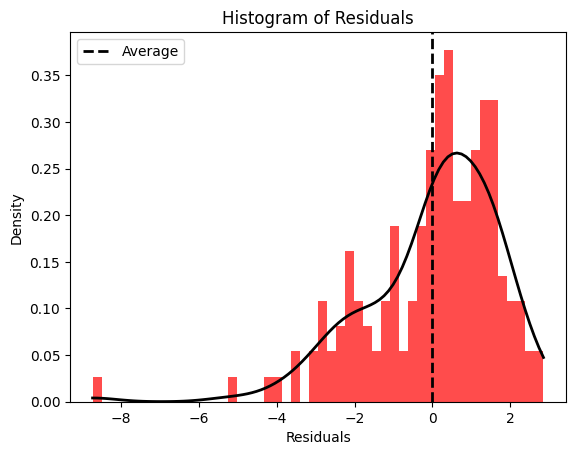%0A)

In \[ \]:

    #QQ-plot - model 1
    sm.qqplot(model_1.resid, line = 's')
    plt.show()

![](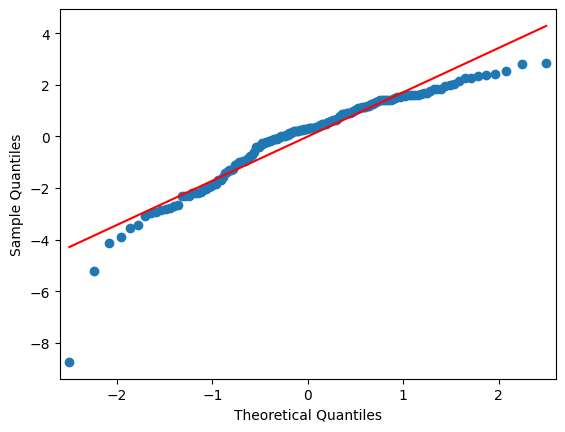%0A)

In \[ \]:

    #Scatter plot of residuals vs. fitted values - model 1
    residuals_fittedvalues_plot(model_1)

![](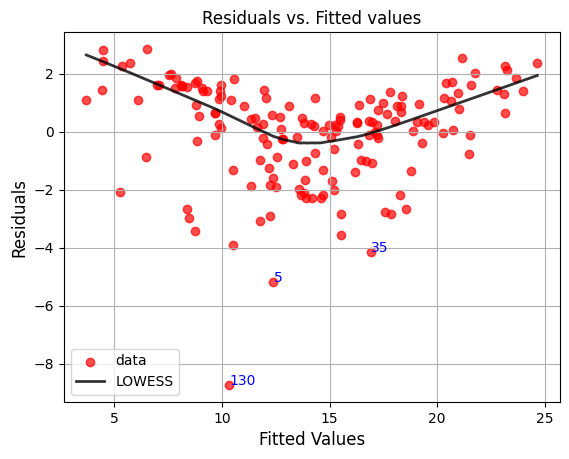%0A)

In \[ \]:

    train.iloc[[5, 35, 130], :]
    # There isn't anything important in these rows.

Out\[ \]:

|     | no  | tv    | radio | newspaper | sales |
|-----|-----|-------|-------|-----------|-------|
| 171 | 172 | 164.5 | 20.9  | 47.4      | 14.5  |
| 44  | 45  | 25.1  | 25.7  | 43.3      | 8.5   |
| 173 | 174 | 168.4 | 7.1   | 12.8      | 11.7  |





In \[ \]:

    #Check Cook's ditance - model 1
    influencer_detector(model_1)

Out\[ \]:

    (array([], dtype=int64),)

In \[ \]:

    #Function to check multicollinearity
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    def calc_vif(X):
        #Calculating VIF
        vif = pd.DataFrame()
        vif["variables"] = X.columns
        vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
        return(vif)

In \[ \]:

    #Check multicollinearity for numeric variables
    calc_vif(X_train[['tv', 'radio', 'newspaper']])
    #Note: If VIF > 10 then multicollinearity is high

Out\[ \]:

|     | variables | VIF      |
|-----|-----------|----------|
| 0   | tv        | 2.372829 |
| 1   | radio     | 3.302786 |
| 2   | newspaper | 3.057785 |





In \[ \]:

    #Box-Cox transformation
    from sklearn.preprocessing import PowerTransformer
    boxcox = PowerTransformer(method = 'box-cox')
    boxcox.fit(y_train.values.reshape(-1, 1))
    boxcox.lambdas_

Out\[ \]:

    array([0.65457649])

In \[ \]:

    trans_y_train = boxcox.fit_transform(y_train.values.reshape(-1, 1))
    plt.hist(trans_y_train, color = 'red', alpha = 0.5, bins = 50)
    plt.show()

![](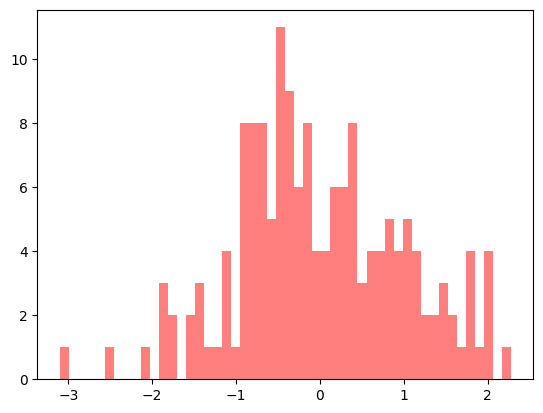%0A)

In \[ \]:

    #Linear regression - model 2
    model_2 = sm.OLS(trans_y_train, X_train).fit()
    model_2.summary()

Out\[ \]:

|                   |                  |                     |          |
|-------------------|------------------|---------------------|----------|
| Dep. Variable:    | y                | R-squared:          | 0.874    |
| Model:            | OLS              | Adj. R-squared:     | 0.871    |
| Method:           | Least Squares    | F-statistic:        | 360.1    |
| Date:             | Tue, 09 Apr 2024 | Prob (F-statistic): | 7.11e-70 |
| Time:             | 17:10:08         | Log-Likelihood:     | -61.434  |
| No. Observations: | 160              | AIC:                | 130.9    |
| Df Residuals:     | 156              | BIC:                | 143.2    |
| Df Model:         | 3                |                     |          |
| Covariance Type:  | nonrobust        |                     |          |

OLS Regression Results

|           |           |         |         |          |         |         |
|-----------|-----------|---------|---------|----------|---------|---------|
|           | coef      | std err | t       | P\>\|t\| | \[0.025 | 0.975\] |
| const     | -2.1658   | 0.076   | -28.651 | 0.000    | -2.315  | -2.016  |
| tv        | 0.0090    | 0.000   | 27.228  | 0.000    | 0.008   | 0.010   |
| radio     | 0.0345    | 0.002   | 16.701  | 0.000    | 0.030   | 0.039   |
| newspaper | 9.485e-05 | 0.001   | 0.068   | 0.946    | -0.003  | 0.003   |

|                |         |                   |           |
|----------------|---------|-------------------|-----------|
| Omnibus:       | 104.499 | Durbin-Watson:    | 2.306     |
| Prob(Omnibus): | 0.000   | Jarque-Bera (JB): | 817.878   |
| Skew:          | -2.312  | Prob(JB):         | 2.51e-178 |
| Kurtosis:      | 13.065  | Cond. No.         | 469\.     |

  
  
Notes:  
\[1\] Standard Errors assume that the covariance matrix of the errors is
correctly specified.

In \[ \]:

    #Histogram of residuals - model 2
    hist_residuals(model_2)

![](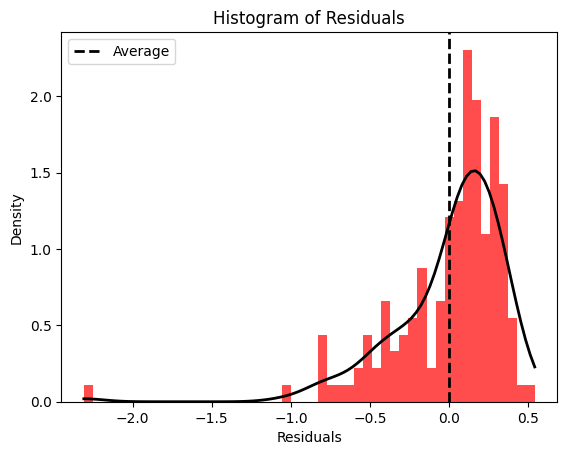%0A)

In \[ \]:

    #QQ-plot - model 2
    sm.qqplot(model_2.resid, line = 's')
    plt.show()

![](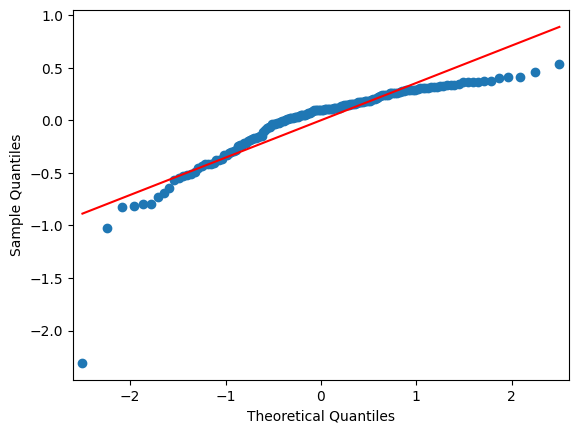%0A)

In \[ \]:

    #Scatter plot of residuals vs. fitted values - model 2
    residuals_fittedvalues_plot(model_2)
    # Here we can see some outliers but still we want to keep them.

![](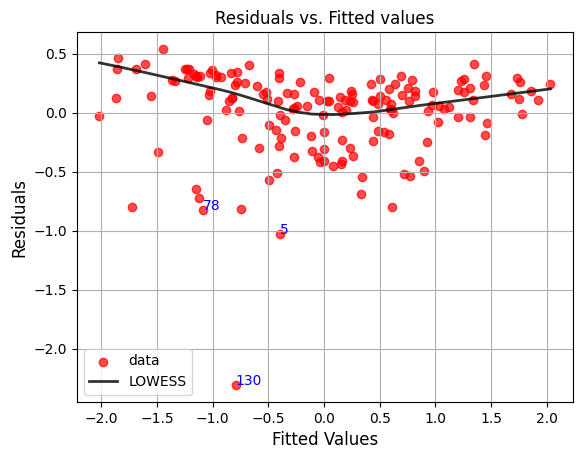%0A)

In \[ \]:

    #Check Cook's ditance - model 2
    influencer_detector(model_2)

Out\[ \]:

    (array([], dtype=int64),)

In \[ \]:

    #Note: Remove observations(one outlier to remain below 1 percent of total data)
    X_train.drop(index = [130], inplace = True)
    y_train.drop(index = [130], inplace = True)
    trans_y_train = PowerTransformer(method = 'box-cox').fit_transform(y_train.values.reshape(-1, 1))

In \[ \]:

    #Linear regression - model 3
    model_3 = sm.OLS(trans_y_train, X_train).fit()
    model_3.summary()

Out\[ \]:

|                   |                  |                     |          |
|-------------------|------------------|---------------------|----------|
| Dep. Variable:    | y                | R-squared:          | 0.898    |
| Model:            | OLS              | Adj. R-squared:     | 0.896    |
| Method:           | Least Squares    | F-statistic:        | 454.1    |
| Date:             | Tue, 09 Apr 2024 | Prob (F-statistic): | 1.56e-76 |
| Time:             | 17:10:10         | Log-Likelihood:     | -44.251  |
| No. Observations: | 159              | AIC:                | 96.50    |
| Df Residuals:     | 155              | BIC:                | 108.8    |
| Df Model:         | 3                |                     |          |
| Covariance Type:  | nonrobust        |                     |          |

OLS Regression Results

|           |         |         |         |          |         |         |
|-----------|---------|---------|---------|----------|---------|---------|
|           | coef    | std err | t       | P\>\|t\| | \[0.025 | 0.975\] |
| const     | -2.1841 | 0.068   | -31.930 | 0.000    | -2.319  | -2.049  |
| tv        | 0.0090  | 0.000   | 29.958  | 0.000    | 0.008   | 0.010   |
| radio     | 0.0366  | 0.002   | 19.511  | 0.000    | 0.033   | 0.040   |
| newspaper | -0.0010 | 0.001   | -0.813  | 0.418    | -0.004  | 0.001   |

|                |        |                   |          |
|----------------|--------|-------------------|----------|
| Omnibus:       | 44.758 | Durbin-Watson:    | 2.320    |
| Prob(Omnibus): | 0.000  | Jarque-Bera (JB): | 77.419   |
| Skew:          | -1.388 | Prob(JB):         | 1.54e-17 |
| Kurtosis:      | 4.995  | Cond. No.         | 472\.    |

  
  
Notes:  
\[1\] Standard Errors assume that the covariance matrix of the errors is
correctly specified.

In \[ \]:

    #Histogram of residuals - model 3
    hist_residuals(model_3)

![](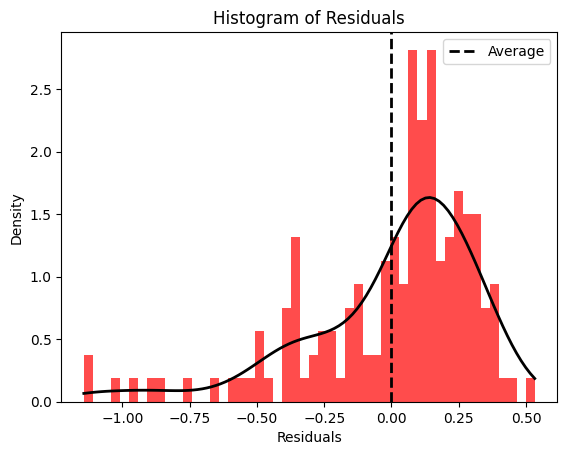%0A)

In \[ \]:

    #QQ-plot - model 3
    sm.qqplot(model_3.resid, line = 's')
    plt.show()

![](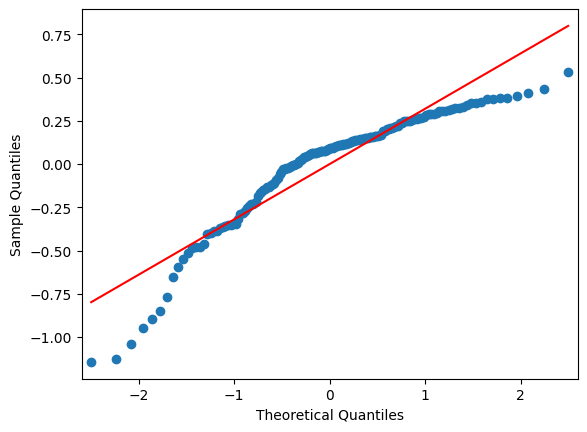%0A)

In \[ \]:

    #Scatter plot of residuals vs. fitted values - model 3
    residuals_fittedvalues_plot(model_3)

![](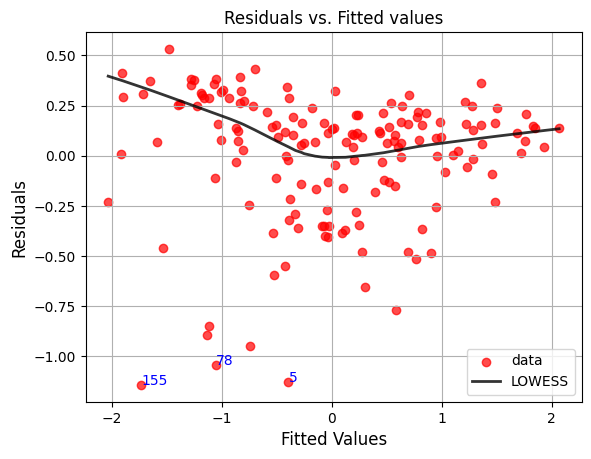%0A)

In \[ \]:

    #Remove non-significant variables from regression model
    X_train.drop(columns = ['newspaper'], inplace = True)

In \[ \]:

    #Linear regression - model 4
    model_4 = sm.OLS(trans_y_train, X_train).fit()
    model_4.summary()

    # Here the model is better than the previous one cause our r-squar is better and
    # AIC and BIC is less than before. Also we can have the untransformed train data and
    # drop the outlier to make another model.

Out\[ \]:

|                   |                  |                     |          |
|-------------------|------------------|---------------------|----------|
| Dep. Variable:    | y                | R-squared:          | 0.897    |
| Model:            | OLS              | Adj. R-squared:     | 0.896    |
| Method:           | Least Squares    | F-statistic:        | 682.3    |
| Date:             | Tue, 09 Apr 2024 | Prob (F-statistic): | 7.35e-78 |
| Time:             | 17:10:11         | Log-Likelihood:     | -44.589  |
| No. Observations: | 159              | AIC:                | 95.18    |
| Df Residuals:     | 156              | BIC:                | 104.4    |
| Df Model:         | 2                |                     |          |
| Covariance Type:  | nonrobust        |                     |          |

OLS Regression Results

|       |         |         |         |          |         |         |
|-------|---------|---------|---------|----------|---------|---------|
|       | coef    | std err | t       | P\>\|t\| | \[0.025 | 0.975\] |
| const | -2.2009 | 0.065   | -33.785 | 0.000    | -2.330  | -2.072  |
| tv    | 0.0090  | 0.000   | 29.984  | 0.000    | 0.008   | 0.010   |
| radio | 0.0360  | 0.002   | 20.913  | 0.000    | 0.033   | 0.039   |

|                |        |                   |          |
|----------------|--------|-------------------|----------|
| Omnibus:       | 44.561 | Durbin-Watson:    | 2.303    |
| Prob(Omnibus): | 0.000  | Jarque-Bera (JB): | 76.460   |
| Skew:          | -1.389 | Prob(JB):         | 2.49e-17 |
| Kurtosis:      | 4.955  | Cond. No.         | 445\.    |

  
  
Notes:  
\[1\] Standard Errors assume that the covariance matrix of the errors is
correctly specified.

In \[ \]:

    #Linear regression - model 5
    model_1 = sm.OLS(y_train, X_train).fit()
    model_1.summary()

    # Now we can see before transforming the r-square is the best between all models
    # but AIC and  BIC is worse than transformed data, so it is a good model too.

Out\[ \]:

|                   |                  |                     |          |
|-------------------|------------------|---------------------|----------|
| Dep. Variable:    | sales            | R-squared:          | 0.903    |
| Model:            | OLS              | Adj. R-squared:     | 0.901    |
| Method:           | Least Squares    | F-statistic:        | 722.5    |
| Date:             | Tue, 09 Apr 2024 | Prob (F-statistic): | 1.32e-79 |
| Time:             | 17:10:11         | Log-Likelihood:     | -297.23  |
| No. Observations: | 159              | AIC:                | 600.5    |
| Df Residuals:     | 156              | BIC:                | 609.7    |
| Df Model:         | 2                |                     |          |
| Covariance Type:  | nonrobust        |                     |          |

OLS Regression Results

|       |        |         |        |          |         |         |
|-------|--------|---------|--------|----------|---------|---------|
|       | coef   | std err | t      | P\>\|t\| | \[0.025 | 0.975\] |
| const | 3.0473 | 0.319   | 9.549  | 0.000    | 2.417   | 3.678   |
| tv    | 0.0444 | 0.001   | 30.076 | 0.000    | 0.042   | 0.047   |
| radio | 0.1904 | 0.008   | 22.581 | 0.000    | 0.174   | 0.207   |

|                |        |                   |          |
|----------------|--------|-------------------|----------|
| Omnibus:       | 16.572 | Durbin-Watson:    | 2.231    |
| Prob(Omnibus): | 0.000  | Jarque-Bera (JB): | 18.541   |
| Skew:          | -0.815 | Prob(JB):         | 9.42e-05 |
| Kurtosis:      | 3.376  | Cond. No.         | 445\.    |

  
  
Notes:  
\[1\] Standard Errors assume that the covariance matrix of the errors is
correctly specified.

In \[ \]:

    # d)
    data.head()

Out\[ \]:

|     | no  | tv    | radio | newspaper | sales |
|-----|-----|-------|-------|-----------|-------|
| 0   | 1   | 230.1 | 37.8  | 69.2      | 22.1  |
| 1   | 2   | 44.5  | 39.3  | 45.1      | 10.4  |
| 2   | 3   | 17.2  | 45.9  | 69.3      | 9.3   |
| 3   | 4   | 151.5 | 41.3  | 58.5      | 18.5  |
| 4   | 5   | 180.8 | 10.8  | 58.4      | 12.9  |





In \[ \]:

    train['tv_radio'] = data['tv'] * data['radio']
    train['tv_newspaper'] = data['tv'] * data['newspaper']
    train['radio_newspaper'] = data['newspaper'] * data['radio']
    train['tv_radio_newspaper'] = data['tv'] * data['radio']* data['newspaper']
    train.head()

Out\[ \]:

|     | no  | tv    | radio | newspaper | sales | tv_radio | tv_newspaper | radio_newspaper | tv_radio_newspaper |
|-----|-----|-------|-------|-----------|-------|----------|--------------|-----------------|--------------------|
| 24  | 25  | 62.3  | 12.6  | 18.3      | 9.7   | 784.98   | 1140.09      | 230.58          | 14365.134          |
| 150 | 151 | 280.7 | 13.9  | 37.0      | 16.1  | 3901.73  | 10385.90     | 514.30          | 144364.010         |
| 114 | 115 | 78.2  | 46.8  | 34.5      | 14.6  | 3659.76  | 2697.90      | 1614.60         | 126261.720         |
| 33  | 34  | 265.6 | 20.0  | 0.3       | 17.4  | 5312.00  | 79.68        | 6.00            | 1593.600           |
| 23  | 24  | 228.3 | 16.9  | 26.2      | 15.5  | 3858.27  | 5981.46      | 442.78          | 101086.674         |





In \[ \]:

    #Define feature matrix
    X_train2 = train[['tv', 'radio', 'newspaper', 'tv_radio', 'tv_newspaper', 'radio_newspaper', 'tv_radio_newspaper']]
    X_train2 = sm.add_constant(X_train2) #add constant
    X_train2.head()

Out\[ \]:

|     | const | tv    | radio | newspaper | tv_radio | tv_newspaper | radio_newspaper | tv_radio_newspaper |
|-----|-------|-------|-------|-----------|----------|--------------|-----------------|--------------------|
| 24  | 1.0   | 62.3  | 12.6  | 18.3      | 784.98   | 1140.09      | 230.58          | 14365.134          |
| 150 | 1.0   | 280.7 | 13.9  | 37.0      | 3901.73  | 10385.90     | 514.30          | 144364.010         |
| 114 | 1.0   | 78.2  | 46.8  | 34.5      | 3659.76  | 2697.90      | 1614.60         | 126261.720         |
| 33  | 1.0   | 265.6 | 20.0  | 0.3       | 5312.00  | 79.68        | 6.00            | 1593.600           |
| 23  | 1.0   | 228.3 | 16.9  | 26.2      | 3858.27  | 5981.46      | 442.78          | 101086.674         |





In \[ \]:

    #Define response matrix
    y_train2 = train['sales']
    y_train2

Out\[ \]:

    24      9.7
    150    16.1
    114    14.6
    33     17.4
    23     15.5
           ...
    17     24.4
    98     25.4
    66      9.5
    126     6.6
    109    19.8
    Name: sales, Length: 160, dtype: float64

In \[ \]:

    #Linear regression - model 1
    model_c1 = sm.OLS(y_train2, X_train2).fit()
    model_c1.summary()

Out\[ \]:

|                   |                  |                     |           |
|-------------------|------------------|---------------------|-----------|
| Dep. Variable:    | sales            | R-squared:          | 0.964     |
| Model:            | OLS              | Adj. R-squared:     | 0.963     |
| Method:           | Least Squares    | F-statistic:        | 588.1     |
| Date:             | Tue, 09 Apr 2024 | Prob (F-statistic): | 1.22e-106 |
| Time:             | 17:10:11         | Log-Likelihood:     | -221.14   |
| No. Observations: | 160              | AIC:                | 458.3     |
| Df Residuals:     | 152              | BIC:                | 482.9     |
| Df Model:         | 7                |                     |           |
| Covariance Type:  | nonrobust        |                     |           |

OLS Regression Results

|                    |            |          |        |          |           |          |
|--------------------|------------|----------|--------|----------|-----------|----------|
|                    | coef       | std err  | t      | P\>\|t\| | \[0.025   | 0.975\]  |
| const              | 6.5215     | 0.528    | 12.346 | 0.000    | 5.478     | 7.565    |
| tv                 | 0.0200     | 0.003    | 6.573  | 0.000    | 0.014     | 0.026    |
| radio              | 0.0216     | 0.018    | 1.171  | 0.243    | -0.015    | 0.058    |
| newspaper          | 0.0200     | 0.020    | 1.010  | 0.314    | -0.019    | 0.059    |
| tv_radio           | 0.0011     | 0.000    | 10.127 | 0.000    | 0.001     | 0.001    |
| tv_newspaper       | -9.406e-05 | 0.000    | -0.902 | 0.369    | -0.000    | 0.000    |
| radio_newspaper    | -0.0002    | 0.001    | -0.340 | 0.734    | -0.001    | 0.001    |
| tv_radio_newspaper | 4.338e-07  | 3.05e-06 | 0.142  | 0.887    | -5.59e-06 | 6.46e-06 |

|                |        |                   |           |
|----------------|--------|-------------------|-----------|
| Omnibus:       | 99.373 | Durbin-Watson:    | 2.245     |
| Prob(Omnibus): | 0.000  | Jarque-Bera (JB): | 698.165   |
| Skew:          | -2.210 | Prob(JB):         | 2.49e-152 |
| Kurtosis:      | 12.230 | Cond. No.         | 1.49e+06  |

  
  
Notes:  
\[1\] Standard Errors assume that the covariance matrix of the errors is
correctly specified.  
\[2\] The condition number is large, 1.49e+06. This might indicate that
there are  
strong multicollinearity or other numerical problems.

In \[ \]:

    #Histogram of residuals - model 1
    hist_residuals(model_c1)

![](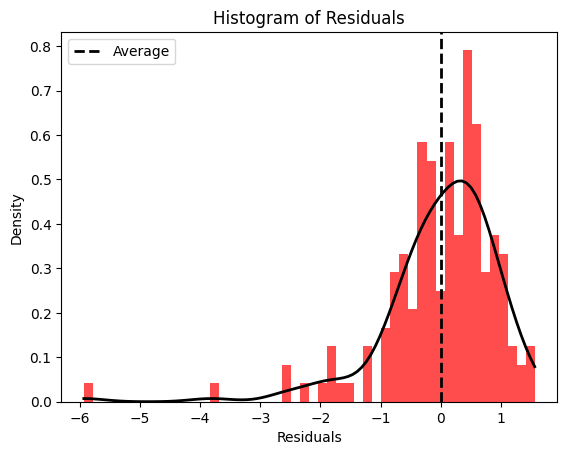%0A)

In \[ \]:

    #QQ-plot - model 1
    sm.qqplot(model_c1.resid, line = 's')
    plt.show()

![](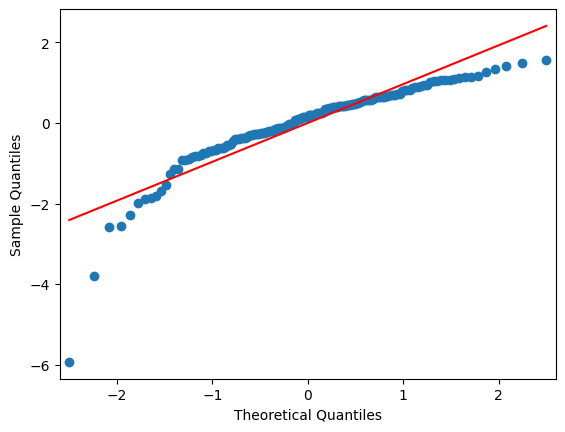%0A)

In \[ \]:

    #Scatter plot of residuals vs. fitted values - model 1
    residuals_fittedvalues_plot(model_c1)

![](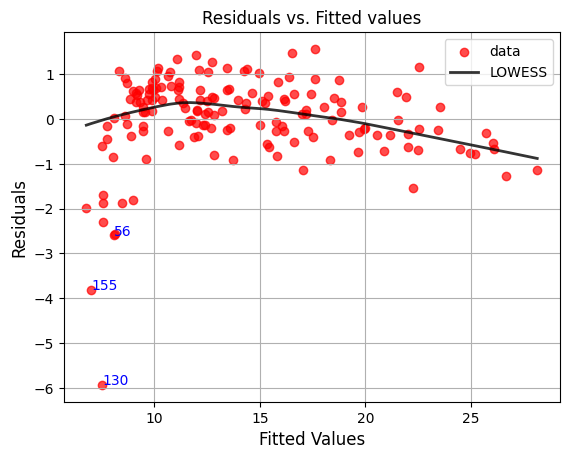%0A)

In \[ \]:

    train.iloc[[56, 130, 155], :]

Out\[ \]:

|     | no  | tv    | radio | newspaper | sales | tv_radio | tv_newspaper | radio_newspaper | tv_radio_newspaper |
|-----|-----|-------|-------|-----------|-------|----------|--------------|-----------------|--------------------|
| 16  | 17  | 67.8  | 36.6  | 114.0     | 12.5  | 2481.48  | 7729.20      | 4172.40         | 282888.720         |
| 173 | 174 | 168.4 | 7.1   | 12.8      | 11.7  | 1195.64  | 2155.52      | 90.88           | 15304.192          |
| 17  | 18  | 281.4 | 39.6  | 55.8      | 24.4  | 11143.44 | 15702.12     | 2209.68         | 621803.952         |





In \[ \]:

    #Check Cook's ditance - model 1
    influencer_detector(model_c1)

Out\[ \]:

    (array([], dtype=int64),)

In \[ \]:

    #Check multicollinearity for numeric variables
    calc_vif(X_train2[['tv', 'radio', 'newspaper', 'tv_radio', 'tv_newspaper', 'radio_newspaper','tv_radio_newspaper']])
    #Note: If VIF > 10 then multicollinearity is high so we should drop some of these
    # features.

Out\[ \]:

|     | variables          | VIF       |
|-----|--------------------|-----------|
| 0   | tv                 | 11.332410 |
| 1   | radio              | 12.031001 |
| 2   | newspaper          | 29.280516 |
| 3   | tv_radio           | 23.890543 |
| 4   | tv_newspaper       | 34.787408 |
| 5   | radio_newspaper    | 27.459636 |
| 6   | tv_radio_newspaper | 37.289349 |





In \[ \]:

    # Now we want to drop an outlier (indext = 130) before transforming the data.
    X_train2.drop(index = [130], inplace = True)
    y_train2.drop(index = [130], inplace = True)

In \[ \]:

    #Linear regression - model 1-b
    model_c1 = sm.OLS(y_train2, X_train2).fit()
    model_c1.summary()

    # As we can see the r-squared is better than before, also the p-values
    # are better now but we should remove the non-significant features now.

Out\[ \]:

|                   |                  |                     |           |
|-------------------|------------------|---------------------|-----------|
| Dep. Variable:    | sales            | R-squared:          | 0.973     |
| Model:            | OLS              | Adj. R-squared:     | 0.972     |
| Method:           | Least Squares    | F-statistic:        | 776.6     |
| Date:             | Tue, 09 Apr 2024 | Prob (F-statistic): | 5.84e-115 |
| Time:             | 17:10:13         | Log-Likelihood:     | -195.27   |
| No. Observations: | 159              | AIC:                | 406.5     |
| Df Residuals:     | 151              | BIC:                | 431.1     |
| Df Model:         | 7                |                     |           |
| Covariance Type:  | nonrobust        |                     |           |

OLS Regression Results

|                    |           |          |        |          |          |          |
|--------------------|-----------|----------|--------|----------|----------|----------|
|                    | coef      | std err  | t      | P\>\|t\| | \[0.025  | 0.975\]  |
| const              | 6.2265    | 0.455    | 13.695 | 0.000    | 5.328    | 7.125    |
| tv                 | 0.0216    | 0.003    | 8.245  | 0.000    | 0.016    | 0.027    |
| radio              | 0.0530    | 0.016    | 3.235  | 0.001    | 0.021    | 0.085    |
| newspaper          | 0.0240    | 0.017    | 1.415  | 0.159    | -0.010   | 0.057    |
| tv_radio           | 0.0010    | 9.87e-05 | 9.907  | 0.000    | 0.001    | 0.001    |
| tv_newspaper       | -0.0001   | 8.95e-05 | -1.309 | 0.192    | -0.000   | 5.96e-05 |
| radio_newspaper    | -0.0006   | 0.000    | -1.366 | 0.174    | -0.002   | 0.000    |
| tv_radio_newspaper | 2.805e-06 | 2.63e-06 | 1.065  | 0.289    | -2.4e-06 | 8.01e-06 |

|                |        |                   |          |
|----------------|--------|-------------------|----------|
| Omnibus:       | 60.213 | Durbin-Watson:    | 2.267    |
| Prob(Omnibus): | 0.000  | Jarque-Bera (JB): | 168.422  |
| Skew:          | -1.545 | Prob(JB):         | 2.68e-37 |
| Kurtosis:      | 6.984  | Cond. No.         | 1.50e+06 |

  
  
Notes:  
\[1\] Standard Errors assume that the covariance matrix of the errors is
correctly specified.  
\[2\] The condition number is large, 1.5e+06. This might indicate that
there are  
strong multicollinearity or other numerical problems.

In \[ \]:

    X_train2.drop(columns = ['newspaper',
                            'tv_newspaper',
                            'radio_newspaper',
                             'tv_radio_newspaper'], inplace = True)

In \[ \]:

    #Linear regression -  best model
    model_c1_b = sm.OLS(y_train2, X_train2).fit()
    model_c1_b.summary()

    # Till now here is the best model.

Out\[ \]:

|                   |                  |                     |           |
|-------------------|------------------|---------------------|-----------|
| Dep. Variable:    | sales            | R-squared:          | 0.973     |
| Model:            | OLS              | Adj. R-squared:     | 0.972     |
| Method:           | Least Squares    | F-statistic:        | 1830\.    |
| Date:             | Tue, 09 Apr 2024 | Prob (F-statistic): | 9.81e-121 |
| Time:             | 17:10:13         | Log-Likelihood:     | -196.54   |
| No. Observations: | 159              | AIC:                | 401.1     |
| Df Residuals:     | 155              | BIC:                | 413.4     |
| Df Model:         | 3                |                     |           |
| Covariance Type:  | nonrobust        |                     |           |

OLS Regression Results

|          |        |          |        |          |         |         |
|----------|--------|----------|--------|----------|---------|---------|
|          | coef   | std err  | t      | P\>\|t\| | \[0.025 | 0.975\] |
| const    | 6.7603 | 0.253    | 26.767 | 0.000    | 6.261   | 7.259   |
| tv       | 0.0190 | 0.001    | 12.701 | 0.000    | 0.016   | 0.022   |
| radio    | 0.0374 | 0.009    | 4.199  | 0.000    | 0.020   | 0.055   |
| tv_radio | 0.0010 | 5.23e-05 | 19.875 | 0.000    | 0.001   | 0.001   |

|                |        |                   |          |
|----------------|--------|-------------------|----------|
| Omnibus:       | 65.419 | Durbin-Watson:    | 2.280    |
| Prob(Omnibus): | 0.000  | Jarque-Bera (JB): | 205.060  |
| Skew:          | -1.635 | Prob(JB):         | 2.96e-45 |
| Kurtosis:      | 7.501  | Cond. No.         | 1.83e+04 |

  
  
Notes:  
\[1\] Standard Errors assume that the covariance matrix of the errors is
correctly specified.  
\[2\] The condition number is large, 1.83e+04. This might indicate that
there are  
strong multicollinearity or other numerical problems.

In \[ \]:

    #Histogram of residuals - model 1-b
    hist_residuals(model_c1_b)

![](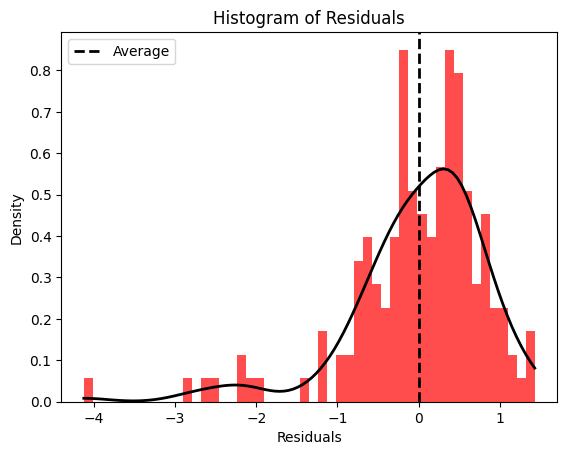%0A)

In \[ \]:

    #QQ-plot - model 1-b
    sm.qqplot(model_c1_b.resid, line = 's')
    plt.show()

![](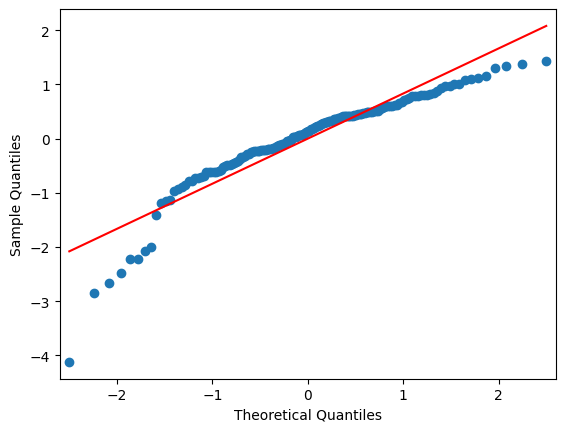%0A)

In \[ \]:

    #Scatter plot of residuals vs. fitted values - model 1-b
    residuals_fittedvalues_plot(model_c1_b)

![](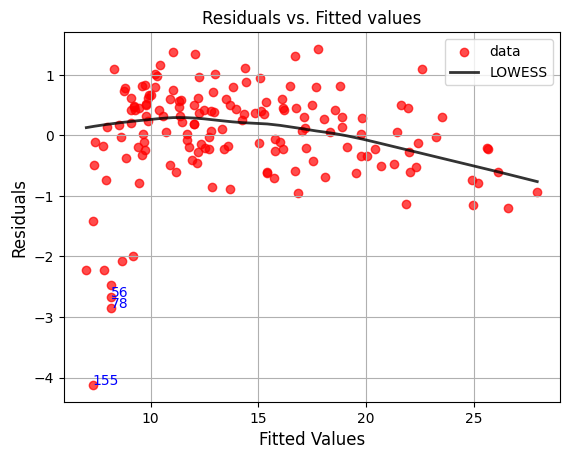%0A)

In \[ \]:

    # in order to analyze other models with transformed data to see if we can
    # improve the performance of the model we continue as below.
    #Box-Cox transformation
    from sklearn.preprocessing import PowerTransformer
    boxcox = PowerTransformer(method = 'box-cox')
    boxcox.fit(y_train2.values.reshape(-1, 1))
    boxcox.lambdas_

Out\[ \]:

    array([0.48158834])

In \[ \]:

    trans_y_train2 = boxcox.fit_transform(y_train2.values.reshape(-1, 1))
    plt.hist(trans_y_train, color = 'red', alpha = 0.5, bins = 50)
    plt.show()

![](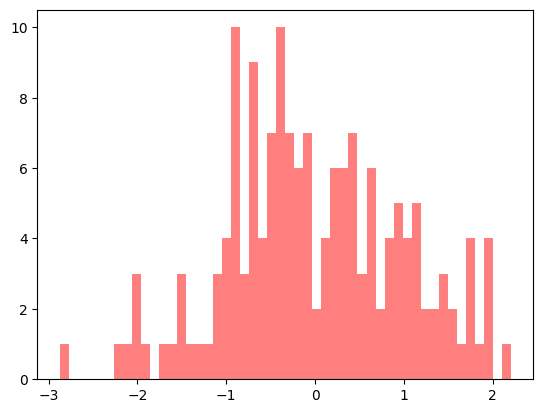%0A)

In \[ \]:

    #Linear regression - model 2
    model_c2 = sm.OLS(trans_y_train2, X_train2).fit()
    model_c2.summary()

    # As we can see the r-squared is less than before but the AIC and BIC
    # is better than before and it depends on the situation to decide between
    # weighting on different metircs such as R-squared and AIC and BIC.

Out\[ \]:

|                   |                  |                     |          |
|-------------------|------------------|---------------------|----------|
| Dep. Variable:    | y                | R-squared:          | 0.936    |
| Model:            | OLS              | Adj. R-squared:     | 0.934    |
| Method:           | Least Squares    | F-statistic:        | 751.2    |
| Date:             | Tue, 09 Apr 2024 | Prob (F-statistic): | 4.45e-92 |
| Time:             | 17:10:14         | Log-Likelihood:     | -7.5107  |
| No. Observations: | 159              | AIC:                | 23.02    |
| Df Residuals:     | 155              | BIC:                | 35.30    |
| Df Model:         | 3                |                     |          |
| Covariance Type:  | nonrobust        |                     |          |

OLS Regression Results

|          |         |          |         |          |         |         |
|----------|---------|----------|---------|----------|---------|---------|
|          | coef    | std err  | t       | P\>\|t\| | \[0.025 | 0.975\] |
| const    | -1.6548 | 0.077    | -21.514 | 0.000    | -1.807  | -1.503  |
| tv       | 0.0053  | 0.000    | 11.624  | 0.000    | 0.004   | 0.006   |
| radio    | 0.0135  | 0.003    | 4.974   | 0.000    | 0.008   | 0.019   |
| tv_radio | 0.0002  | 1.59e-05 | 9.597   | 0.000    | 0.000   | 0.000   |

|                |        |                   |          |
|----------------|--------|-------------------|----------|
| Omnibus:       | 86.663 | Durbin-Watson:    | 2.281    |
| Prob(Omnibus): | 0.000  | Jarque-Bera (JB): | 402.892  |
| Skew:          | -2.053 | Prob(JB):         | 3.26e-88 |
| Kurtosis:      | 9.630  | Cond. No.         | 1.83e+04 |

  
  
Notes:  
\[1\] Standard Errors assume that the covariance matrix of the errors is
correctly specified.  
\[2\] The condition number is large, 1.83e+04. This might indicate that
there are  
strong multicollinearity or other numerical problems.

In \[ \]:

    #Histogram of residuals - model 2
    hist_residuals(model_c2)

![](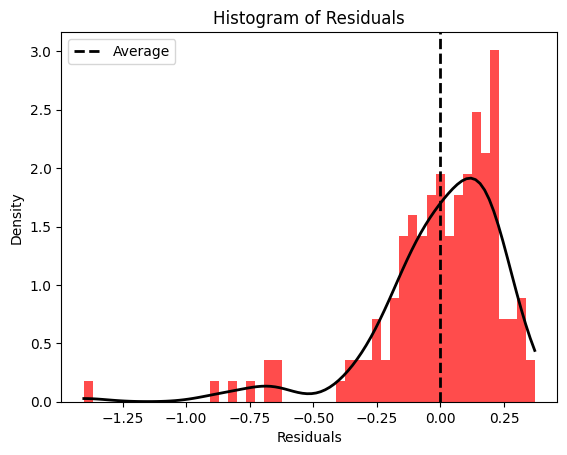%0A)

In \[ \]:

    #QQ-plot - model 2
    sm.qqplot(model_c2.resid, line = 's')
    plt.show()

![](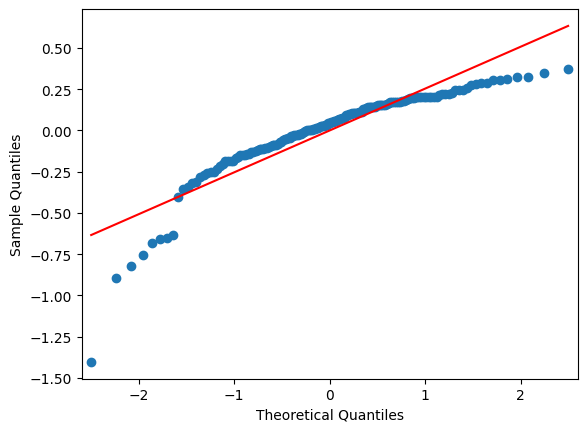%0A)

In \[ \]:

    #Scatter plot of residuals vs. fitted values - model 2
    residuals_fittedvalues_plot(model_c2)

![](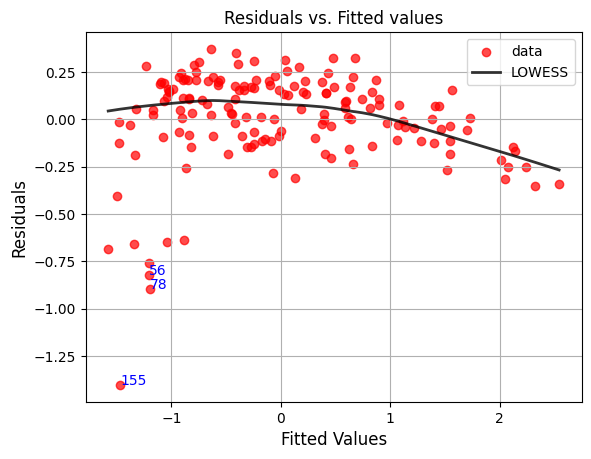%0A)

In \[ \]:

    #Check multicollinearity for numeric variables
    calc_vif(X_train2[['tv', 'radio', 'tv_radio']])
    #Note: If VIF > 10 then multicollinearity is high
    # Now every metircs are acceptable

Out\[ \]:

|     | variables | VIF      |
|-----|-----------|----------|
| 0   | tv        | 3.618993 |
| 1   | radio     | 3.930637 |
| 2   | tv_radio  | 6.468731 |





In \[ \]:

    test['tv_radio'] = test['tv'] * test['radio']
    test.head()

Out\[ \]:

|     | no  | tv    | radio | newspaper | sales | tv_radio |
|-----|-----|-------|-------|-----------|-------|----------|
| 50  | 51  | 199.8 | 3.1   | 34.6      | 11.4  | 619.38   |
| 127 | 128 | 80.2  | 0.0   | 9.2       | 8.8   | 0.00     |
| 37  | 38  | 74.7  | 49.4  | 45.7      | 14.7  | 3690.18  |
| 149 | 150 | 44.7  | 25.8  | 20.6      | 10.1  | 1153.26  |
| 19  | 20  | 147.3 | 23.9  | 19.1      | 14.6  | 3520.47  |





In \[ \]:

    #Model Evaluation
    #Define the feature matrix
    X_test2 = test[['tv', 'radio', 'tv_radio']]
    X_test2 = sm.add_constant(X_test2) #add constant
    X_test2.head()

Out\[ \]:

|     | const | tv    | radio | tv_radio |
|-----|-------|-------|-------|----------|
| 50  | 1.0   | 199.8 | 3.1   | 619.38   |
| 127 | 1.0   | 80.2  | 0.0   | 0.00     |
| 37  | 1.0   | 74.7  | 49.4  | 3690.18  |
| 149 | 1.0   | 44.7  | 25.8  | 1153.26  |
| 19  | 1.0   | 147.3 | 23.9  | 3520.47  |





In \[ \]:

    X_train2.columns

Out\[ \]:

    Index(['const', 'tv', 'radio', 'tv_radio'], dtype='object')

In \[ \]:

    X_test2.columns

Out\[ \]:

    Index(['const', 'tv', 'radio', 'tv_radio'], dtype='object')

In \[ \]:

    #Prediction using  best model
    test_pred2 = model_c1_b.predict(X_test2)
    test_pred2

Out\[ \]:

    50     11.325759
    127     8.287944
    37     13.866567
    149     9.775657
    19     14.118851
    104    21.071477
    179    12.009754
    53     20.733993
    162    14.569929
    158     8.812650
    82     10.542746
    185    21.960598
    182     8.376982
    189     7.804419
    108     7.030225
    31     11.603381
    4      12.637486
    178    12.778324
    121     8.354381
    20     18.243679
    172     8.295196
    88     11.736354
    166     9.207708
    170     8.749504
    128    24.007874
    72      9.424738
    180    10.263633
    26     14.929729
    144    10.626097
    52     21.820210
    79     10.186210
    93     22.421998
    183    26.698978
    119     8.051123
    85     14.823101
    133    19.852478
    184    18.009525
    139    20.360225
    95     16.415824
    140    10.091272
    dtype: float64

In \[ \]:

    #Inverse transformation of predicted values
    test['pred'] = pd.Series(test_pred2.values.reshape(-1, 1).reshape(-1),
                             index = test_pred2.index)
    test.head()

Out\[ \]:

|     | no  | tv    | radio | newspaper | sales | tv_radio | pred      |
|-----|-----|-------|-------|-----------|-------|----------|-----------|
| 50  | 51  | 199.8 | 3.1   | 34.6      | 11.4  | 619.38   | 11.325759 |
| 127 | 128 | 80.2  | 0.0   | 9.2       | 8.8   | 0.00     | 8.287944  |
| 37  | 38  | 74.7  | 49.4  | 45.7      | 14.7  | 3690.18  | 13.866567 |
| 149 | 150 | 44.7  | 25.8  | 20.6      | 10.1  | 1153.26  | 9.775657  |
| 19  | 20  | 147.3 | 23.9  | 19.1      | 14.6  | 3520.47  | 14.118851 |





In \[ \]:

    #Actual vs. Prediction
    plt.scatter(x = test['sales'], y = test['pred'],
                c = 'black', alpha = 0.7)
    plt.xlabel('Actual')
    plt.ylabel('Prediction')
    plt.title('Actual vs. Prediction')

    #Add 45 degree line
    xp = np.linspace(test['sales'].min(), test['sales'].max(), 100)
    plt.plot(xp, xp, c = 'red', linewidth = 3)
    plt.show()

    # Now we can see the prediction below that is satisfactory.

![](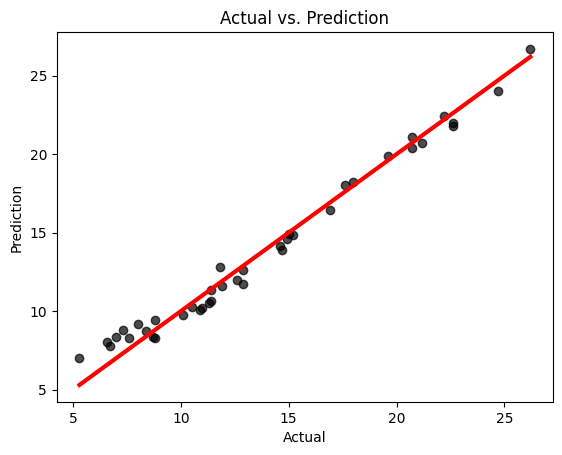%0A)

In \[ \]:

    MAE = test['abs_pct_err'] = round(abs(test['sales'] - test['pred']) ,2)
    MAE.describe()

    # The MAE is 0.635 as we can see the mean below.

Out\[ \]:

    count    40.000000
    mean      0.635000
    std       0.408995
    min       0.070000
    25%       0.327500
    50%       0.505000
    75%       0.810000
    max       1.730000
    dtype: float64

In \[ \]:

    #Absolute percentage error
    test['abs_pct_err'] = round(abs(test['sales'] - test['pred']) / test['sales'] * 100, 2)

In \[ \]:

    #Summary statistics for absolute percentage error
    test['abs_pct_err'].describe()

    # The MAPE is 6.4 as we can see the mean below.

Out\[ \]:

    count    40.000000
    mean      6.418500
    std       7.011984
    min       0.470000
    25%       2.215000
    50%       3.375000
    75%       7.405000
    max      32.650000
    Name: abs_pct_err, dtype: float64

**Q2**

In \[ \]:

    from scipy.stats import t

    t_statistics = [1.64, 3.01]
    degrees_of_freedom = [34, 10]  #  degrees of freedom = sample size - # of parameters
    results = []
    for t_statistic, df in zip(t_statistics, degrees_of_freedom):
        p_value = t.sf(abs(t_statistic), df) * 2
        results.append({'t-statistic': t_statistic, 'df': df, 'p-value': p_value})
    df_results = pd.DataFrame(results)
    print(df_results)

       t-statistic  df   p-value
    0         1.64  34  0.110226
    1         3.01  10  0.013118